In [51]:
import numpy as np
import pandas as pd
import sklearn
import pickle

import matplotlib.pyplot as plt
import cv2

In [52]:
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
model_svm = pickle.load(open('./model/model_svm.pickle', mode = 'rb'))
pca_models = pickle.load(open('./model/pca_dict.pickle', mode = 'rb'))

In [53]:
model_pca = pca_models['pca']
mean_face_arr = pca_models['mean_face']

In [72]:
#step1: read img
img = cv2.imread('./test_images/top_1.jpg')
#step2: convert into gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#step3: crop the face
faces = haar.detectMultiScale(gray, 1.1, 3)

predictions = []

for x,y,w,h in faces:
    
    roi = gray[y:y+h, x:x+w]

    #step4: normalization
    roi = roi / 255.0
    #step5: resize images (300, 300)
    if roi.shape[1] > 300:
        roi_resize = cv2.resize(roi, (300, 300), cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi, (300, 300), cv2.INTER_CUBIC)

    #step6: flattening
    roi_reshape = roi_resize.reshape(1, 90000)
    #step7: subtract with mean
    roi_mean = roi_reshape - mean_face_arr 
    #step8: get eigen img (apply roi_mean to pca)
    eigen_image = model_pca.transform(roi_mean)
    #step9: eigen img for visualization
    eig_img = model_pca.inverse_transform(eigen_image)
    #step10: pass to ml model
    results = model_svm.predict(eigen_image)
    prob_score = model_svm.predict_proba(eigen_image)
    prob_score_max = prob_score.max()

    #step 11: generate report
    text = "%s : %d"%(results[0], prob_score_max*100)
    print(text)
    #defining color base on results
    if results[0] == 'male':
        color = (0, 255, 0)
    else:
        color = (0, 255, 255)
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    cv2.rectangle(img, (x,y-30), (x+w, y), color, -1)
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 255), 2)
    output = {
        'roi' : roi,
        'eig_img' : eig_img,
        'prediction_name' : results[0],
        'score': prob_score_max
    }

    predictions.append(output)



female : 53
female : 54
female : 55
female : 51
male : 51
female : 52
female : 51
female : 54


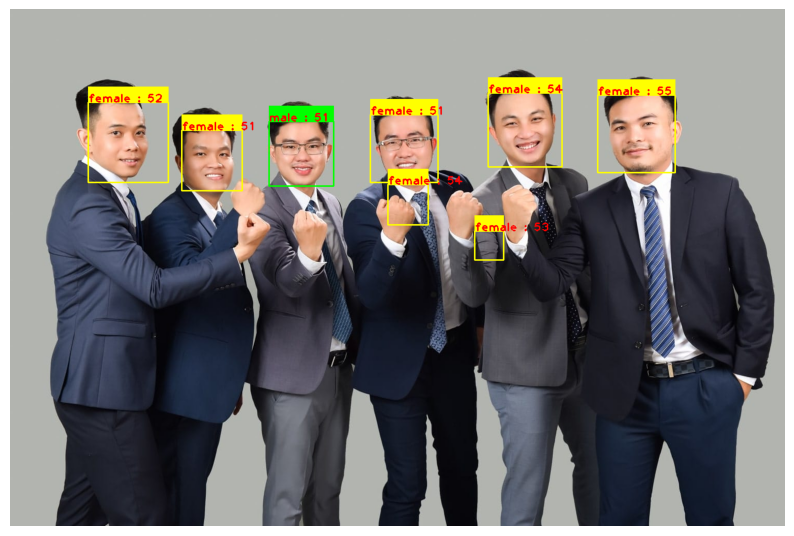

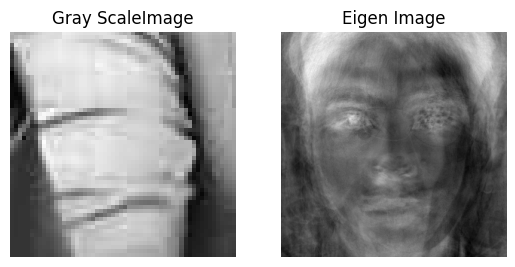

Predicted Gender =  female
Predicted score = 53.95 %
----------------------------------------------------------------------------------------------------


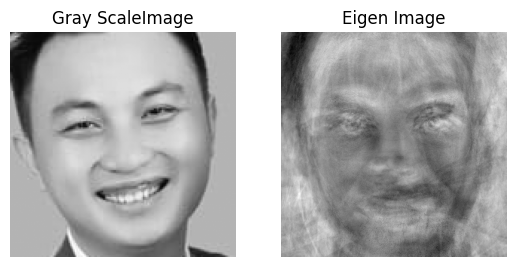

Predicted Gender =  female
Predicted score = 54.09 %
----------------------------------------------------------------------------------------------------


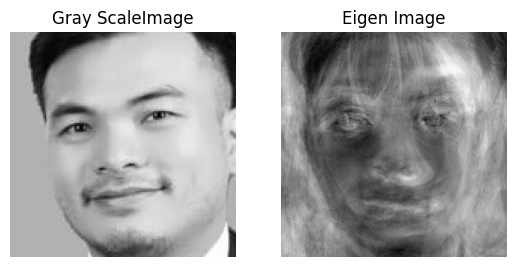

Predicted Gender =  female
Predicted score = 55.43 %
----------------------------------------------------------------------------------------------------


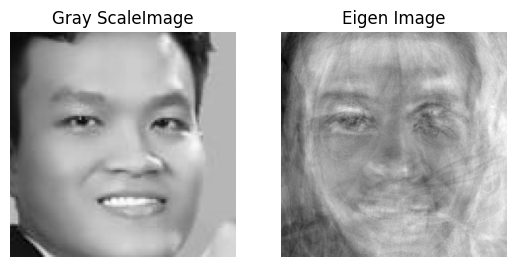

Predicted Gender =  female
Predicted score = 51.89 %
----------------------------------------------------------------------------------------------------


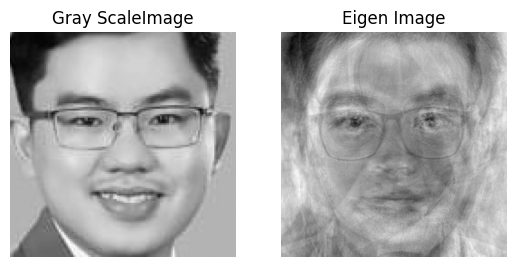

Predicted Gender =  male
Predicted score = 51.68 %
----------------------------------------------------------------------------------------------------


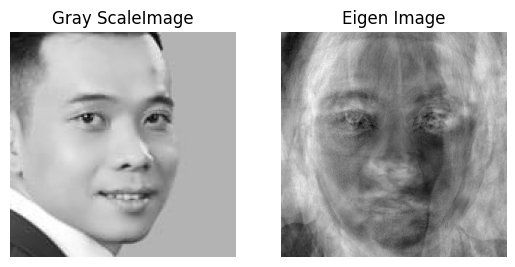

Predicted Gender =  female
Predicted score = 52.52 %
----------------------------------------------------------------------------------------------------


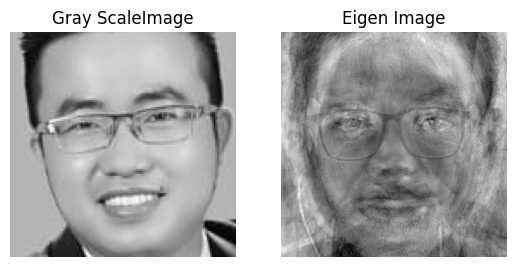

Predicted Gender =  female
Predicted score = 51.72 %
----------------------------------------------------------------------------------------------------


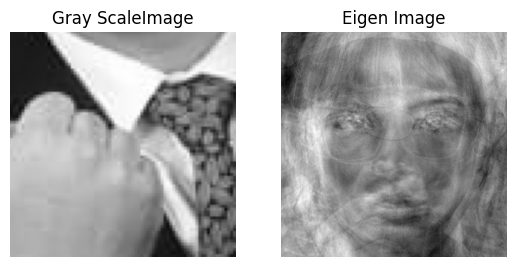

Predicted Gender =  female
Predicted score = 54.75 %
----------------------------------------------------------------------------------------------------


In [73]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show() 


#gen report
for i in range(len(predictions)):
    obj_gray = predictions[i]['roi']
    obj_eig = predictions[i]['eig_img'].reshape(300,300)
    plt.subplot(1,2,1)
    plt.imshow(obj_gray, cmap = 'gray')
    plt.title('Gray ScaleImage')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig, cmap = 'gray')
    plt.title('Eigen Image')
    plt.axis('off')

    plt.show()
    print('Predicted Gender = ', predictions[i]['prediction_name'])
    print('Predicted score = {:,.2f} %'.format(predictions[i]['score']*100))

    print('-'*100)